<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span></li><li><span><a href="#Предобработка-и-подготовка-данных" data-toc-modified-id="Предобработка-и-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Исправление-проблем-в-таблицах" data-toc-modified-id="Исправление-проблем-в-таблицах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исправление проблем в таблицах</a></span><ul class="toc-item"><li><span><a href="#Таблица-users" data-toc-modified-id="Таблица-users-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Таблица users</a></span></li><li><span><a href="#Таблица-calls" data-toc-modified-id="Таблица-calls-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Таблица calls</a></span></li><li><span><a href="#Таблица-messages" data-toc-modified-id="Таблица-messages-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Таблица messages</a></span></li><li><span><a href="#Таблица-internet" data-toc-modified-id="Таблица-internet-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Таблица internet</a></span></li><li><span><a href="#Таблица-tariffs" data-toc-modified-id="Таблица-tariffs-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Таблица tariffs</a></span></li></ul></li><li><span><a href="#Добавление-расчётных-данных" data-toc-modified-id="Добавление-расчётных-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Добавление расчётных данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-1" data-toc-modified-id="Гипотеза-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза 1</a></span></li><li><span><a href="#Гипотеза-2" data-toc-modified-id="Гипотеза-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гипотеза 2</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Анализ тарифных планов оператора сотовой связи

В проекте требуется провести анализ двух тарифных планов от оператора сотовой связи. Цель проведения анализа: определение более прибыльного тарифа для корректировки рекламного бюджета компании. Анализ будет производиться на небольшой выборке в 500 клиентов на основе данных об их действиях за 2018 год.

Проект должен включать стандартные шаги по анализу данных: изучение данных из источников, предобработка данных, добавление в данные расчётных значений, исследовательский анализ, формулировка и проверка гипотез, формулировка выводов.

## Изучение данных из файлов

Загрузим данные из нескольких файлов и ознакомимся с таблицами. В таблице internet присутствует столбец *Unnamed:0* c номерами строк, поэтому при загрузке данных сделаем этот столбец индексом таблицы.

При выводе информации о таблицах сделаем заголовки с названиями таблиц жирным шрифтом с помощью управляющих символов ANSI. Проверим корректность наименования столбцов.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try: 
    users = pd.read_csv('users.csv')
    calls = pd.read_csv('calls.csv')
    messages = pd.read_csv('messages.csv')
    internet = pd.read_csv('internet.csv', index_col=0)
    tariffs = pd.read_csv('tariffs.csv')
except:
    users = pd.read_csv('/datasets/users.csv')
    calls = pd.read_csv('/datasets/calls.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    internet = pd.read_csv('/datasets/internet.csv', index_col=0)
    tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
print('\033[1m'+'Таблица users:'+'\033[0m')
users.info()
print('\n\033[1m'+'Таблица calls:'+'\033[0m')
calls.info()
print('\n\033[1m'+'Таблица messages:'+'\033[0m')
messages.info()
print('\n\033[1m'+'Таблица internet:'+'\033[0m')
internet.info()
print('\n\033[1m'+'Таблица tariffs:'+'\033[0m')
tariffs.info()

Таблица users:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Таблица calls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+

В таблице users есть пропуски в столбце churn_date, но они допустимы согласно описанию данных к проекту.

Теперь проверим наличие лишних пробелов в названиях столбцов в таблицах.

In [4]:
print('Таблица users:', users.columns)
print('Таблица calls:', calls.columns)
print('Таблица messages:', messages.columns)
print('Таблица internet:', internet.columns)
print('Таблица tariffs:', tariffs.columns)

Таблица users: Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')
Таблица calls: Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')
Таблица messages: Index(['id', 'message_date', 'user_id'], dtype='object')
Таблица internet: Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')
Таблица tariffs: Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')


С наименованиями столбцов всё в порядке (присутствует "змеиный регистр", нет лишних пробелов на концах). Можно приступать к предобработке данных.

## Предобработка и подготовка данных

### Исправление проблем в таблицах

#### Таблица users

Изучим внимательнее данные в таблицах для исправления потенциальных проблем. Начнём с таблицы users.

In [5]:
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Столбец churn_date содержит значения NaN, но они оправданы согласно описанию данных. Оставим эти значения как есть. Но тип столбца преобразуем в DateTime. Значения NaN преобразуются в NaT.

In [6]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.churn_date.dtype.name

'datetime64[ns]'

Преобразование прошло корректно. Так же преобразуем тип данных в столбце reg_date.

In [7]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.reg_date.dtype.name

'datetime64[ns]'

Проверим, какие значения содержатся в столбце tariff. Должно быть два уникальных значения.

In [8]:
users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

Проблем в столбце нет. 

Теперь проверим таблицу на наличие явных дубликатов.

In [9]:
users.duplicated().sum()

0

Явных дубликатов в таблице не выявлено.

#### Таблица calls

In [10]:
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Преобразуем тип столбца call_date в date_time.

In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.call_date.dtype.name

'datetime64[ns]'

Преобразование прошло корректно. 

Столбец duration хранит длительность звонков в минутах. Согласно описанию тарифных планов оператора "Мегалайн" всегда происходит округление длительности разговора в большую сторону до минут. Поэтому имеет смысл округлить в большую сторону данные в столбце duration. Для такого округления используем метод `np.ceil`. Затем преобразуем тип данных столбца в целочисленный.

In [12]:
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Округление и преобразование прошли корректно. Звонки с нулевой длительностью соответствуют пропущенным звонкам согласно описанию данных. 

Теперь проверим таблицу на наличие явных дубликатов.

In [13]:
calls.duplicated().sum()

0

Явных дубликатов в таблице не выявлено.

#### Таблица messages

In [14]:
messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Преобразуем тип данных столбца message_date в date_time.

In [15]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.message_date.dtype.name

'datetime64[ns]'

Проверим таблицу на наличие явных дубликатов.

In [16]:
messages.duplicated().sum()

0

Явных дубликатов в таблице не выявлено.

#### Таблица internet

In [17]:
internet.tail(10)

,id,mb_used,session_date,user_id
149386,1499_147,0.00,2018-10-21,1499
149387,1499_148,268.19,2018-11-13,1499
149388,1499_149,778.68,2018-11-24,1499
149389,1499_150,273.98,2018-11-20,1499
149390,1499_151,752.72,2018-10-11,1499
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499
149395,1499_156,544.37,2018-10-26,1499


В столбце mb_used присутствуют нулевые значения. Их можно воспринимать как неудачные попытки выхода в интернет, когда использования интернет-трафика не было. Удалять строки с этими нулевыми значениями не будем, так как они показывают, были ли у пользователя технические проблемы.

Преобразуем тип данных столбца session_date в date_time.

In [18]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.session_date.dtype.name

'datetime64[ns]'

Проверим таблицу на наличие явных дубликатов.

In [19]:
internet.duplicated().sum()

0

Явных дубликатов в таблице не выявлено.

#### Таблица tariffs

In [20]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Следует перевести значения столбца mb_per_month_included в Гигабайты, так как в тарифах учитываются именно они. Потом можно переименовать сам столбец.

In [21]:
tariffs['mb_per_month_included'] = (tariffs['mb_per_month_included']/1024).astype('int')
tariffs.rename(columns={'mb_per_month_included':'gb_per_month_included'}, inplace=True)
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


Проверим таблицу на наличие явных дубликатов.

In [22]:
tariffs.duplicated().sum()

0

Явных дубликатов в таблице не выявлено.

### Добавление расчётных данных

Для каждого пользователя необходимо посчитать количество сделанных звонков и израсходованных минут разговора по месяцам. Для этого сначала создадим в таблице calls отдельный столбец с месяцем звонков. Повторения месяцев для разных годов не будет, так как в таблице содержатся сведения только за 2018 год.

In [23]:
calls['month'] = calls['call_date'].dt.month
calls.head(3)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6


Столбец успешно добавился в таблицу. Теперь с помощью сводной таблицы посчитаем количество звонков и сумму израсходованных минут в месяц. В конце переименуем столбцы сводной таблицы.

In [24]:
calls_grouped = (calls.pivot_table(index=['user_id', 'month'], values=['id', 'duration'], 
                                 aggfunc={'id':'count', 'duration':'sum'}))
calls_grouped.columns = ('monthly_duration','calls_count')
calls_grouped.head(5)

monthly_duration  calls_count
user_id month                               
1000    5                   159           22
        6                   172           43
        7                   340           47
        8                   408           52
        9                   466           58

Аналогичные сводные таблицы составим также для сообщений и интернет траффика по месяцам (перед этими действиями добавим в таблицы столбцы с номером месяца). В сводной таблице с объёмом трафика по месяцам переведём мегабайты в гигабайты и округлим в бОльшую сторону (так как в тарифах трафик за месяц округляется до гигабайт).

In [25]:
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month
display(messages.head(3))
display(internet.head(3))

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8


,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6


In [26]:
messages_grouped = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
internet_grouped = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
messages_grouped.rename(columns={'id':'messages_count'}, inplace=True)
internet_grouped.rename(columns={'mb_used':'monthly_traffic'}, inplace=True)
internet_grouped['monthly_traffic'] = np.ceil(internet_grouped['monthly_traffic']/1024).astype('int')
display(messages_grouped.head(10))
display(internet_grouped.head(10))

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
        10                 73
        11                 58
        12                 70
1002    6                   4
        7                  11

monthly_traffic
user_id month                 
1000    5                    3
        6                   23
        7                   14
        8                   14
        9                   15
        10                  15
        11                  15
        12                  10
1001    11                  18
        12                  14

Сводные таблицы составились корректно. Теперь объединим таблицы calls_grouped, messages_grouped и internet_grouped по их мультииндексам.

In [27]:
users_monthly_data = calls_grouped.join([messages_grouped, internet_grouped], how='outer')
display(users_monthly_data)
users_monthly_data.info()

monthly_duration  calls_count  messages_count  monthly_traffic
user_id month                                                                
1000    5                 159.0         22.0            22.0              3.0
        6                 172.0         43.0            60.0             23.0
        7                 340.0         47.0            75.0             14.0
        8                 408.0         52.0            81.0             14.0
        9                 466.0         58.0            57.0             15.0
...                         ...          ...             ...              ...
1498    10                247.0         41.0            42.0             21.0
1499    9                  70.0          9.0            11.0              2.0
        10                449.0         68.0            48.0             18.0
        11                612.0         74.0            59.0             18.0
        12                492.0         69.0            66.0             13.0

[3214 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   monthly_duration  3174 non-null   float64
 1   calls_count       3174 non-null   float64
 2   messages_count    2717 non-null   float64
 3   monthly_traffic   3203 non-null   float64
dtypes: float64(4)
memory usage: 130.4 KB


Объединение таблицы прошло успешно. В некоторых столбцах появились пропуски. Это логично, так как не все пользователи, к примеру, пользовались сообщениями. А кто-то не пользовался интернетом. Заполним все эти пропуски нулями.

In [28]:
users_monthly_data.fillna(value=0, inplace=True)
users_monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   monthly_duration  3214 non-null   float64
 1   calls_count       3214 non-null   float64
 2   messages_count    3214 non-null   float64
 3   monthly_traffic   3214 non-null   float64
dtypes: float64(4)
memory usage: 130.4 KB


Пропуски успешно заполнились нулями. К сожалению, видно, что тип данных у столбцов после объединения таблиц изменился на вещественный. Нужно это исправить и привести все столбцы к целочисленному типу.

In [29]:
users_monthly_data = users_monthly_data.astype('int')
users_monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   monthly_duration  3214 non-null   int32
 1   calls_count       3214 non-null   int32
 2   messages_count    3214 non-null   int32
 3   monthly_traffic   3214 non-null   int32
dtypes: int32(4)
memory usage: 80.2 KB


Преобразование типа данных прошло верно. Теперь в таблицу users_monthly_data следует добавить столбец со помесячной выручкой от пользователей. Назовём этот столбец monthly_revenue. Для расчёта значений в этом столбце необходимо знать наименование тарифа у конкретного пользователя (эти сведения содержатся в таблице users). По наименованию тарифа можно определить параметры для расчёта выручки из таблицы tariffs. 

Поэтому необходимо сначала добавить в таблицу столбец tariff (для п. 4 проекта ещё добавим столбец city). Для решения этой задачи создадим датафрейм users_slice, включающий только столбцы user_id, tariff и city из таблицы users. Потом присвоим индексам датафрейма users_slice значения столбца user_id с помощью метода set_index. Так мы подготовим датафрейм users_slice к объединению с датафреймом users_monthly_data с помощью команды join.

In [30]:
users_slice = users[['user_id', 'tariff', 'city']]
users_slice.set_index('user_id', drop=True, inplace=True)
users_monthly_data = users_monthly_data.join(users_slice)
users_monthly_data.head(20)

monthly_duration  calls_count  messages_count  monthly_traffic  \
user_id month                                                                   
1000    5                   159           22              22                3   
        6                   172           43              60               23   
        7                   340           47              75               14   
        8                   408           52              81               14   
        9                   466           58              57               15   
        10                  350           57              73               15   
        11                  338           43              58               15   
        12                  333           46              70               10   
1001    11                  430           59               0               18   
        12                  414           63               0               14   
1002    6                   117           15               4               11   
        7                   214           26              11               18   
        8                   289           42              13               20   
        9                   206           36               4               17   
        10                  212           33              10               14   
        11                  243           32              16               19   
        12                  236           33              12               18   
1003    8                   380           55              37                9   
        9                   961          134              91               13   
        10                  855          108              83               15   

              tariff         city  
user_id month                      
1000    5      ultra    Краснодар  
        6      ultra    Краснодар  
        7      ultra    Краснодар  
        8      ultra    Краснодар  
        9      ultra    Краснодар  
        10     ultra    Краснодар  
        11     ultra    Краснодар  
        12     ultra    Краснодар  
1001    11     smart       Москва  
        12     smart       Москва  
1002    6      smart  Стерлитамак  
        7      smart  Стерлитамак  
        8      smart  Стерлитамак  
        9      smart  Стерлитамак  
        10     smart  Стерлитамак  
        11     smart  Стерлитамак  
        12     smart  Стерлитамак  
1003    8      ultra       Москва  
        9      ultra       Москва  
        10     ultra       Москва

Столбец со значениями тарифов успешно добавился. Только теперь можно создавать столбец monthly_revenue. Для заполнения этого столбца расчётными значениями выручки напишем функцию `revenue_calc` для вычисления выручки и применим её к столбцу monthly_revenue через функцию apply. Также напишем функцию `kill_neg` которая на выходе даёт ноль, если аргумент отрицательный. Эта функция пригодится внутри функции revenue_calc (если, к примеру, пользователь проговорил в месяц 300 минут, а в тариф включено 500, то при расчёте выручки не должна рассчитываться сумма за доп. минуты).

In [31]:
def kill_neg(value):
    if value<0:
        return 0
    else:
        return value

def revenue_calc(data_row):
    if data_row.tariff=='smart':
        return ((kill_neg(data_row.monthly_duration-tariffs.loc[0,'minutes_included']))*tariffs.loc[0,'rub_per_minute']+
                (kill_neg(data_row.monthly_traffic-tariffs.loc[0,'gb_per_month_included']))*tariffs.loc[0,'rub_per_gb']+
                (kill_neg(data_row.messages_count-tariffs.loc[0,'messages_included']))*tariffs.loc[0,'rub_per_message']+
                tariffs.loc[0,'rub_monthly_fee'])
    elif data_row.tariff=='ultra':
        return ((kill_neg(data_row.monthly_duration-tariffs.loc[1,'minutes_included']))*tariffs.loc[1,'rub_per_minute']+
                (kill_neg(data_row.monthly_traffic-tariffs.loc[1,'gb_per_month_included']))*tariffs.loc[1,'rub_per_gb']+
                (kill_neg(data_row.messages_count-tariffs.loc[1,'messages_included']))*tariffs.loc[1,'rub_per_message']+
                tariffs.loc[1,'rub_monthly_fee'])
    else:
        return 0

users_monthly_data['monthly_revenue'] = users_monthly_data.apply(revenue_calc, axis=1)
users_monthly_data.head(10)

monthly_duration  calls_count  messages_count  monthly_traffic  \
user_id month                                                                   
1000    5                   159           22              22                3   
        6                   172           43              60               23   
        7                   340           47              75               14   
        8                   408           52              81               14   
        9                   466           58              57               15   
        10                  350           57              73               15   
        11                  338           43              58               15   
        12                  333           46              70               10   
1001    11                  430           59               0               18   
        12                  414           63               0               14   

              tariff       city  monthly_revenue  
user_id month                                     
1000    5      ultra  Краснодар             1950  
        6      ultra  Краснодар             1950  
        7      ultra  Краснодар             1950  
        8      ultra  Краснодар             1950  
        9      ultra  Краснодар             1950  
        10     ultra  Краснодар             1950  
        11     ultra  Краснодар             1950  
        12     ultra  Краснодар             1950  
1001    11     smart     Москва             1150  
        12     smart     Москва              550

Расчёт помесячной выручки с каждого пользователя произведён корректно.

## Анализ данных

Изучим распределение количества минут, количества сообщений и интернет траффика для пользователей каждого тарифа в месяц. Для этого посчитаем средние значения, стандартное отклонение и дисперсию, а также построим гистограммы. Отдельно посчитаем среднюю выручку для каждого тарифа.

Для получения расчётных значений создадим сводную таблицу с группировкой по названию тарифа и применим необходимые расчётные функции.

Так как в проекте рассматривается выборка из генеральной совокупности пользователей, то стандартное отклонение и дисперсию необходим рассчитывать для n-1 элементов. При использовании функций std и var из библиотеки Pandas по умолчанию расчёт производится именно для n-1 элементов, отдельная передача параметров в функции необязательна.

In [32]:
tariff_stat_values = users_monthly_data.pivot_table(index='tariff', 
                                                values=['monthly_duration','messages_count','monthly_traffic','monthly_revenue'],
                                                aggfunc={'monthly_duration':['mean', 'std', 'var'],
                                                'messages_count':['mean', 'std', 'var'],
                                                'monthly_traffic':['mean', 'std', 'var'],
                                                'monthly_revenue':['mean', 'sum']
                                                     })
tariff_stat_values = tariff_stat_values[['monthly_duration','messages_count','monthly_traffic','monthly_revenue']]
tariff_stat_values

monthly_duration                            messages_count             \
                   mean         std            var           mean        std   
tariff                                                                         
smart        417.934948  190.313730   36219.315784      33.384029  28.227876   
ultra        526.623350  317.606098  100873.633397      49.363452  47.804457   

                    monthly_traffic                      monthly_revenue  \
                var            mean       std        var            mean   
tariff                                                                     
smart    796.812958       16.328847  5.747061  33.028705     1289.973531   
ultra   2285.266143       19.494416  9.853511  97.091686     2070.152284   

                   
              sum  
tariff             
smart   2875351.0  
ultra   2039100.0

Теперь построим гистограммы для исследования распределений в рассматриваемых данных. Для разделения данных по тарифам создадим два среза.

In [33]:
user_data_smart = users_monthly_data.query('tariff=="smart"')
user_data_ultra = users_monthly_data.query('tariff=="ultra"')

Теперь построим гистограммы для исследуемых параметров. Для наглядности совместим гистограммы для двух тарифов на одном графике по каждому исследуемому параметру.

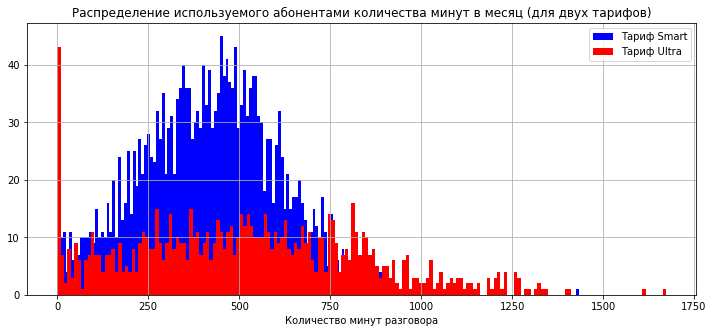

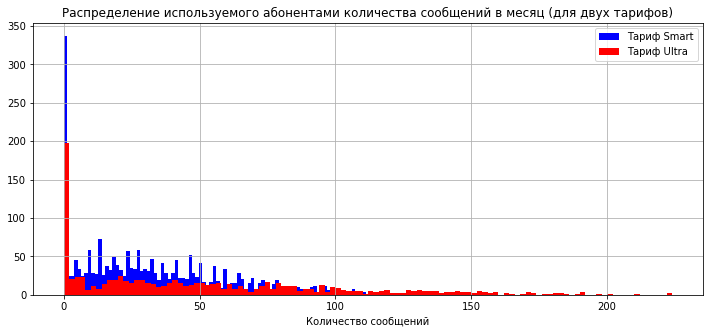

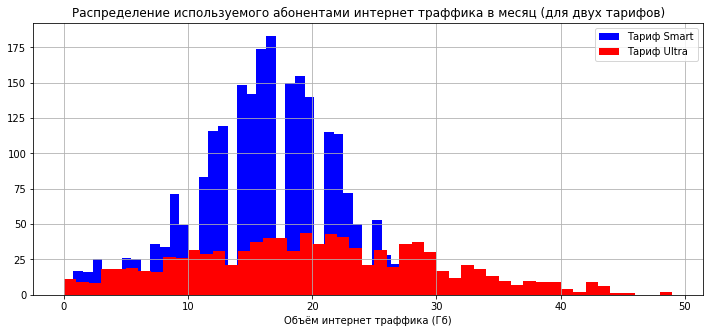

In [34]:
fig1, ax1 = plt.subplots(figsize=(12,5))
user_data_smart.hist(column='monthly_duration', bins=180, color='b', ax=ax1, label='Тариф Smart')
user_data_ultra.hist(column='monthly_duration', bins=180, color='r', ax=ax1, label='Тариф Ultra')
plt.title('Распределение используемого абонентами количества минут в месяц (для двух тарифов)')
plt.xlabel('Количество минут разговора')
plt.legend()
plt.show()

fig1, ax1 = plt.subplots(figsize=(12,5))
user_data_smart.hist(column='messages_count', bins=112, color='b', ax=ax1, label='Тариф Smart')
user_data_ultra.hist(column='messages_count', bins=112, color='r', ax=ax1, label='Тариф Ultra')
plt.title('Распределение используемого абонентами количества сообщений в месяц (для двух тарифов)')
plt.xlabel('Количество сообщений')
plt.legend()
plt.show()

fig1, ax1 = plt.subplots(figsize=(12,5))
user_data_smart.hist(column='monthly_traffic', bins=49, color='b', ax=ax1, label='Тариф Smart')
user_data_ultra.hist(column='monthly_traffic', bins=49, color='r', ax=ax1, label='Тариф Ultra')
plt.title('Распределение используемого абонентами интернет траффика в месяц (для двух тарифов)')
plt.xlabel('Объём интернет траффика (Гб)')
plt.legend()
plt.show()

**Выводы**:
1. Тариф Smart: 
    - пользователи в среднем тратят в месяц 418 минут разговора, отправляют 33 сообщения и тратят 16 Гб интернет-траффика;
    - пользователи в среднем превышают включенный в тариф пакет интернет трафика на 1 Гб;
    - распределения использованного количества минут и объёма интернет трафика близки к нормальному. Распределение количества сообщений имеет большой разброс и положительную скошенность (скошено вправо), а нулевое значение имеет высокое количественное значение. Это не является аномалией, так как многие пользователи могут не пользоваться сообщениями по причине использования интернет-мессенджеров.
2. Тариф Ultra: 
    - пользователи в среднем тратят в месяц 527 минут разговора, отправляют 49 сообщений и тратят 19 Гб интернет-траффика;
    - превышения включенных в тариф пакетов минут, сообщений и траффика в среднем нет;
    - распределения использованного количества минут и объёма интернет трафика близки к нормальному. Распределение количества сообщений имеет большой разброс и положительную скошенность (скошено вправо), а нулевое значение имеет высокое количественное значение;
    - в целом все распределения имеют бОльшие разбросы, чем в тарифе Smart. Это ожидаемо, так как в тарифе Ultra пакеты с минутами, сообщениями и трафиком больше. В тарифе Utra больше человек не используют минуты разговора, что свидетельствует о том, что тариф в этом случае нужен пользователям для доступа в интернет.

## Проверка гипотез

### Гипотеза 1

Требуется проверить, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Сформулируем нулевую и альтернативную гипотезы:
- нулевая гипотеза: средняя выручка пользователей тарифов Ultra и Smart равна;
- альтернативная гипотеза: средняя выручка пользователей тарифов Ultra и Smart различается.

Для проверки гипотезы воспользуемся t-критерием Стьюдента и применим метод `ttest_ind`. Все выборки содержат более 30 элементов. Параметр equal_var установим в значение False, так как выборки пользователей разных тарифов имеют разный размер (соответственно могут различаться дисперсии). Датафреймы с выборками по каждому тарифу были созданы ранее в п. 3.

In [35]:
alpha = 0.05
results = st.ttest_ind(user_data_smart.monthly_revenue, user_data_ultra.monthly_revenue, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


**Вывод**: нулевая гипотеза о том, что средняя выручка пользователей тарифов Ultra и Smart равна, отвергается в пользу альтернативной. А именно, средняя выручка пользователей тарифов Ultra и Smart различается.

### Гипотеза 2

Требуется проверить, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Сформулируем нулевую и альтернативную гипотезы:
- нулевая гипотеза: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов;
- альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.

Для начала создадим два датафрейма с данными для пользователей из Москвы и других регионов. 

После этого выполним проверку гипотезы с t-критерием Стьюдента с применением метода `ttest_ind`. Количество элементов в выборках более 30. Установим параметр equal_var в значение False, так как выборки пользователей из Москвы и других регионов имеют разный размер (соответственно могут различаться дисперсии).

In [36]:
user_data_moscow = users_monthly_data.query("city=='Москва'")
user_data_other_reg = users_monthly_data.query("city!='Москва'")

In [37]:
alpha = 0.05
results = st.ttest_ind(user_data_moscow.monthly_revenue, user_data_other_reg.monthly_revenue, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


**Вывод**: нулевая гипотеза о том, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов не отвергается.

## Общий вывод

Был проведён анализ тарифных планов Smart и Ультра от оператора мобильной связи Мегалайн. В результате были сделаны следующие выводы:
- пользователи тарифа Smart в среднем не укладываются во включенный в тариф пакет интернет траффика и нечасто пользуются отправкой сообщений. Пользователи тарифа Ultra в среднем укладываются во включенные в тариф пакеты интернет траффика, минут и сообщений. Но так же нечасто пользуются сообщениями;
- отвергнута гипотеза о том, что средняя выручка пользователей тарифов Ultra и Smart равна;
- гипотеза о том, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов не отвергается;
- исходя из средней выручки тариф Ultra лучше, так как у него выше абонентская плата и, соответственно, выручка. Но стоит учесть тот факт, что не все пользователи готовы платить больше за другой тариф, если им не нужны большие пакеты минут, сообщений или интернет-траффика. Тариф Smart необходимо оставить в линейке тарифов, но стоит увеличить пакет интернет траффика в нём и абоненсткую плату.